In [37]:
import sys
sys.path.insert(0, "..")

from well_logs.batchflow import FilesIndex, Dataset, V
from well_logs.batchflow.models.tf import ResNet18

from well_logs import Well
from well_logs import WellBatch

AttributeError: module 'tensorflow' has no attribute 'layers'

In [2]:
index = FilesIndex(path='/Users/akozhevin/data/quality/*', dirs=True)

In [3]:
dataset = Dataset(index, WellBatch)

In [13]:
ppl = dataset.p.load().split_segments().random_crop(n_crops=16, height=0.1)

In [33]:
batch = ppl.next_batch(1, n_epochs=None)

def make_data(batch):
    res = {
        'labels': [],
        'samples_dl': [],
        'samples_uv': []
    }

    for well in batch.wells:
        res['samples_dl'].append(np.stack([segment.core_dl for segment in well.segments], axis=0))
        res['samples_uv'].append(np.stack([segment.core_uv for segment in well.segments], axis=0))
        res['labels'].append([segment.samples['PHOTO QC'].values[0] for segment in well.segments])
    
    res = {key: np.concatenate(value, axis=0) for key, value in res.items()}
    
    return res

load: 9.950002034505209e-06 s
random_crop: 0.00023108323415120443 s


In [34]:
make_data(batch)

{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]),
 'samples_dl': array([[[[0.39607844, 0.34117648, 0.30588236],
          [0.3137255 , 0.29803923, 0.28235295],
          [0.5058824 , 0.49411765, 0.47058824],
          ...,
          [0.62352943, 0.6       , 0.5686275 ],
          [0.39607844, 0.36862746, 0.30588236],
          [0.23921569, 0.19607843, 0.15294118]],
 
         [[0.4       , 0.34117648, 0.3019608 ],
          [0.33333334, 0.30980393, 0.29411766],
          [0.5176471 , 0.5058824 , 0.4745098 ],
          ...,
          [0.63529414, 0.6156863 , 0.58431375],
          [0.45490196, 0.42352942, 0.3764706 ],
          [0.32941177, 0.2901961 , 0.23137255]],
 
         [[0.40784314, 0.3529412 , 0.3137255 ],
          [0.31764707, 0.29411766, 0.28235295],
          [0.50980395, 0.49803922, 0.47058824],
          ...,
          [0.6509804 , 0.63529414, 0.60784316],
          [0.5019608 , 0.47843137, 0.44313726],
          [0.34509805, 0.3137255 , 0.24313726]],
 


In [25]:
samples_dl.shape

(16, 50, 50, 3)

In [13]:
batch.wells[0].segments[0].samples

,DEPTH_FROM,DEPTH_TO,PHOTO QC,COMMENT
SAMPLE,,,,
417по_2775.1_2775.82.png,2775.1,2775.82,1,NaN


In [7]:
segment = batch.wells[0].segments[4]

In [14]:
segment["GK", "BK", "GZ1", "IK", "NKTD", "SP"].plot()

In [7]:
batch.wells[0].segments[3].depth

0.09999999999990905

In [6]:
segment = batch.wells[0].segments[0]

In [10]:
segment.random_crop(0.1, 2)

[2356.0008478  2355.82023579]


In [8]:
import numpy as np
np.random.uniform(2355.6, 2356.4, size=1)

array([2356.18975691])

In [3]:
well = Well(path="/Users/akozhevin/data/dataset updated/417PO/", force_load_logs=True)

In [18]:
batch.wells[0].segments[0].logs.columns

Index(['IKVG1', 'IKVG2', 'IKVG3', 'IKVG4', 'IKVG5', 'MGZ', 'MPZ', 'ALPS', 'BK',
       'DENSITY', 'DT', 'GK', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'GZ7', 'IK',
       'IKVR1', 'IKVR2', 'IKVR3', 'IKVR4', 'IKVR5', 'KGGK', 'KPO', 'KW', 'MBK',
       'MLM', 'NKTD', 'NKTM', 'PZ', 'RP', 'SG', 'SP', 'SXWB', 'TT1', 'TT2',
       'VGL', 'C1', 'C2', 'DS', 'KGL', 'PRON', 'KPS', 'MCAL', 'RS', 'NKTR'],
      dtype='object')

In [20]:
well["GK", "BK", "GZ1", "IK", "NKTD", "SP"].plot()

In [6]:
core_data = well.segments[0].core_data
depth = core_data['Глубина кровли интервала'] + core_data['Место взятия от верха, м']
density = well.segments[0].logs['DENSITY']

(2770, 2800)

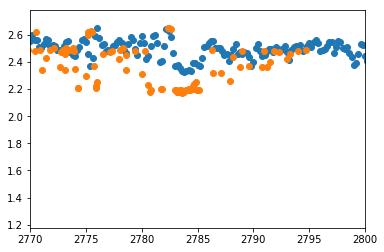

In [7]:
import matplotlib.pyplot as plt
plt.scatter(density.index, (density.values))
plt.scatter(depth, (core_data['Плотность (объемная)']))
plt.xlim((2770, 2800))